In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import h5py
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
from matplotlib.lines import Line2D
import matplotlib.font_manager
import numpy as np

import atlas_mpl_style as ampl
ampl.use_atlas_style(usetex=True)
ampl.set_color_cycle("Paper", 6)

/home/abadea/.local/lib/python3.8/site-packages/atlas_mpl_style/__init__.py:212: UserWarning: No LaTeX installation found -- atlas-mpl-style is falling back to usetex=False
  _warn.warn(


In [5]:
with h5py.File("outdir/pythia8235/etaMassScanCtauMin/results.h5", "r") as f:
    m_eta = np.array(f["m_eta"])
    mean = np.array(f["mean"])
    std = np.array(f["std"])
    counts = np.array(f["counts"])

0.5406 0.6917742695417343


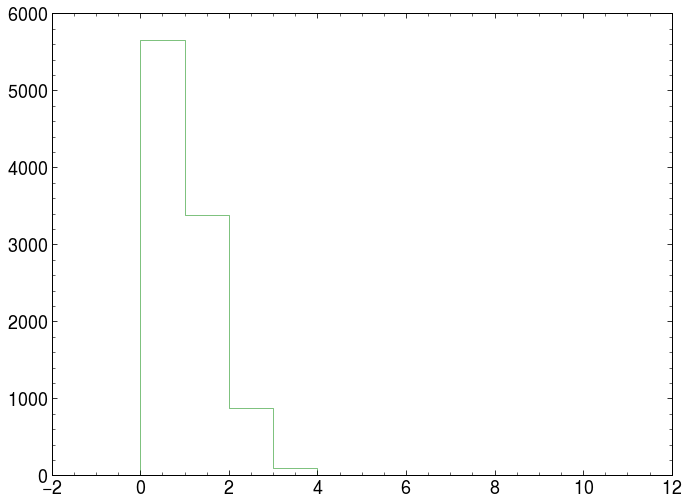

In [6]:
bins = np.linspace(0,11,12)
plt.hist(counts[29], histtype="step", bins=bins)
print(mean[29], std[29])

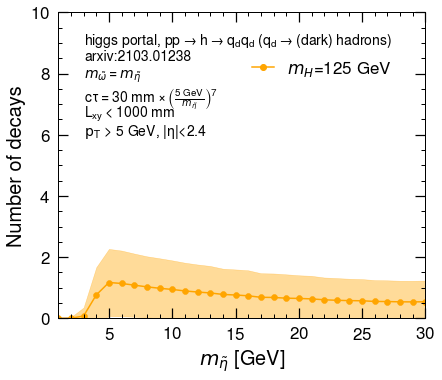

In [7]:
# make plot
fig = plt.figure(figsize=(6, 5))
ax = plt.axes([0.1, 0.1, 0.85, 0.85])

# Plotting the mean line, with points, and upper and lower bands (mean ± 1 std deviation)
plt.plot(m_eta, mean, color='orange')
plt.scatter(m_eta, mean, label=r'$\mathit{m_{H}}$=125 GeV', alpha=1.0, color="orange")
plt.fill_between(m_eta, mean - std, mean + std, color='orange', alpha=0.4) #, label='±1 Std Dev')

# tick params
tick_params_major = {"which"     : "major",
                     "length"    : 10,
                     "width"     : 1.25,
                     "direction" : "in",
                     "right"     : True,
                     "top"       : True,
                     "labelsize" : 17,
                     "pad"       : 8}
tick_params_minor = {"which"     : "minor",
                     "length"    : 4,
                     "width"     : 1,
                     "direction" : "in",
                     "right"     : True,
                     "top"       : True,
                     "labelsize" : 15}

# ax.xaxis.set_minor_locator(AutoMinorLocator(5))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(**tick_params_major)
ax.tick_params(**tick_params_minor)
plt.locator_params(axis='y', nbins=8)
plt.locator_params(axis='x', nbins=8)

# set limits
plt.xlim(1,30)
plt.ylim(0,10)

# axis labels
plt.xlabel(r'$\mathit{m_{\tilde{\eta}}}$ [GeV]')
plt.ylabel("Number of decays") #r'Number of $\tilde{\eta}$ decays/Event')

# legend
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], linestyle='-', marker='o', c=h.get_edgecolor()) for h in handles]
ax.legend(new_handles,
          labels,
          title="",
          title_fontsize="13",
          ncol=1,
          framealpha=0.0,
          prop={'size': 17},
          bbox_to_anchor=(0.5, 0.4, 0.45, 0.5), #(0.54, 0.45, 0.45, 0.5)
          handlelength=1.25)

# add text
left, top, t = 0.07, 0.94, 0.06
stamps = [
    r"higgs portal, $pp \rightarrow h \rightarrow q_{d}q_{d} \; (q_{d} \rightarrow (dark) \; hadrons)$",
    "arxiv:2103.01238",
    r"$\mathit{m_{\tilde{\omega}}} = \mathit{m_{\tilde{\eta}}}$",
    r"$c\tau = 30\; mm \times \left(\frac{5 \; GeV}{\mathit{m_{\tilde{\eta}}}}\right)^{7}$", #  # 5 \; GeV / \mathit{m_{\tilde{\eta}}}
    r"$L_{xy} < 1000\; mm$",
    r"$\mathrm{p_{T}}$ > 5 GeV, |$\eta$|<2.4",
]
for i, stamp in enumerate(stamps):
    plt.text(left, top - i*t, stamp, fontsize=14, ha='left', va='top', transform=plt.gca().transAxes)

# save
plt.savefig("number_of_decays_pythia8235.pdf", bbox_inches="tight")